# Proyecto Final: Procesamiento de Datos - Grupo N°18

**Integrantes:**

    * Gutiérrez Diego - dgutierrez.m79@gmail.com - Git_user:Diego-wert89
    * Gutiérrez Laura - laurasgneco@gmail.com - Git_user:laurasg2022
    * Hilgemberg Maria Sol - shilgembergmariasol22@gmail.com - Git_user:sol-hilgemberg
    * Lara Mariela - marzular@gmail.com - Git_user:MARIELARA
    * Ruani Julio - julio.ruani@gmail.com - Git_user:immersSoftware
    * Sánchez Jorge Ignacio - nacho.sanchezsolano@gmail.com - Git_user:nachosanchezsolano
    * Valdiviezo Melisa - melisa.valdiviezo@gmail.com - Git_user:MEV-656

 **El proyecto consiste en desarrollar un procesamiento de datos que incluya las siguientes etapas:** 

**1) Recolección y preparación de datos: Obtener o recolectar conjuntos de datos relevantes para el tema elegido. Realizar las tareas de limpieza, integración y transformación necesarias para preparar los datos para el análisis.**

Para el proyecto utilizamos el siguiente dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

En la recolección se hace una carga del data set en la notebook que contiene un archivo csv listo para empezar el desarrollo.

In [29]:
#Primero importamos las librerias que se van a utilizar
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

#Leemos el data set con pandas (dataframe) y con el head mostramos los primeros 10 registros para evaluar el contenido.
data_df=pd.read_csv("../Data_Sets/ds_salaries.csv")

data_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [30]:
#Analisamos las dimensiones del data set en el dataframe:

data_df.shape

#Como resultado tenemos 3755 filas y 11 columnas.

(3755, 11)

In [31]:
#Evaluamos los tipos de datos que hay en las columnas.

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Analizando el data set podemos concluir que tenemos lo siguiente:

1-El data set tiene 3755 filas y 11 columnas.

2-Contiene datos del tipo string(object) y int(enteros).

3-No tiene faltantes de datos.

Igualmente se procede hacer un doble verificación para ver si hay faltante de datos:

In [32]:
#Faltante de datos
data_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Finalmente se observa que no hay faltantes de datos en los campos del data set, por lo que se prosigue con la limpieza de datos.

**Limpieza**

Para su aplicación se van a evaluar los siguientes puntos:

-Columnas irrelevantes

-Cambio nombres de atributos.

-Registros repetidos.

-Valores extremos.

-Datos faltantes.

**Columnas irrelevantes:** observamos que las columnas "salary" y "salary_currency" no son necesarias para el analisis, ya que la columna salary_in_usd se encarga de representar el salario de los empleados de forma equitativa. 

In [33]:
#Se procede a eliminar las columnas "salary" y "salary_currency" porque no son relevantes.

data_df.drop(data_df[['salary','salary_currency']], axis = 1, inplace = True)
data_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [34]:
#Verificación del borrado de los campos anteriores.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


**Cambio de nombres en atributos:** para un mejor analisis se procede a cambiar el nombre de los atributos para traducirlos de ingles a español, con el fin de que se adapte al lector objetivo.

In [35]:
#Cambio de nombres en los atributos:

data_df.rename(columns={'work_year':'Año_de_trabajo','experience_level':'Nivel_de_experiencia','employment_type':'Tipo_de_empleo','job_title':'Título_de_trabajo','salary_in_usd':'Salario_en_usd','employee_residence':'Residencia_empleado','remote_ratio':'Ratio_remoto','company_location':'Ubicación_empresa','company_size':'tamaño_de_empresa'}, inplace = True)
data_df

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


**Registros repetidos:** se debe verificar que no se repitan registros en el data set, porque podrian perjudicar el resultado del análisis.

In [36]:
# Verificación de registros duplicados
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

Hay registros duplicados encontrados:


,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


In [37]:
#Eliminamos los registros duplicados:

data_df.drop_duplicates(inplace=True)

In [38]:
# Verificación nuevamente si hay registros duplicados.
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

No se encontraron registros duplicados en el dataset.


**Valores extremos:** nos permite ver si hay datos que no son adecuados, valores fuera de un rango, etc.

Por ejemplo: en el salario no puede haber un valor negativo.

**Procesamiento y análisis de datos**
La etapa de análisis de datos es un proceso crucial en el campo de la ciencia de datos. Durante esta etapa, se exploran y examinan los conjuntos de datos con el objetivo de descubrir patrones, tendencias y relaciones ocultas que pueden proporcionar información valiosa.
A continuación, se utilizan diversas herramientas y técnicas estadísticas para analizar los datos. Esto implica calcular medidas descriptivas, como la media, la mediana y la desviación estándar, que proporcionan una comprensión básica de las características centrales y la dispersión de los datos.



In [39]:
# Análisis básico del la variable salario

datos = data_df

print("Salario_en_usd:")
print("Promedio:", datos['Salario_en_usd'].mean())
print("Mediana:", datos['Salario_en_usd'].median())
print("Desviación estándar:", datos['Salario_en_usd'].std())



Salario_en_usd:
Promedio: 133409.28018575851
Mediana: 130000.0
Desviación estándar: 67136.83732925013


El promedio de los salarios es de aproximadamente $133,409.28. 
La mediana del salario es de $130,000. La mediana es el valor central de los salarios ordenados de menor a mayor. Al ser inferior al promedio, esto sugiere que hay salarios más altos que están afectando el promedio hacia arriba.
La desviación estándar de $67,136.84 indica la dispersión de los salarios con respecto al promedio. Una desviación estándar relativamente alta sugiere que los salarios varían considerablemente en el conjunto de datos. 

In [ ]:
# Media y desviacion de del ratio de trabajo remoto

print("\nRatio_remoto:")
print("Promedio:", datos['Ratio_remoto'].mean())
print("Mediana:", datos['Ratio_remoto'].median())
print("Desviación estándar:" datos['Ratio_remoto'].std())


Ratio_remoto:
Promedio: 50.48374613003096
Mediana: 50.0
Desviación estándar: 48.16370698234963


El promedio del ratio de modalidad de trabajo remoto es de aproximadamente 50.48. Este valor indica que, en promedio, los empleados en el conjunto de datos tienen un equilibrio entre el trabajo presencial y el trabajo remoto. 
La desviación estándar de 48.16 muestra que hay una variabilidad significativa en el ratio de modalidad de trabajo remoto en el conjunto de datos. Esto sugiere que algunos empleados tienen un alto grado de trabajo remoto, mientras que otros tienen un mayor enfoque en el trabajo presencial. La amplia desviación estándar indica que hay una diversidad en la forma en que los empleados en el conjunto de datos se comprometen con la modalidad de trabajo remoto.

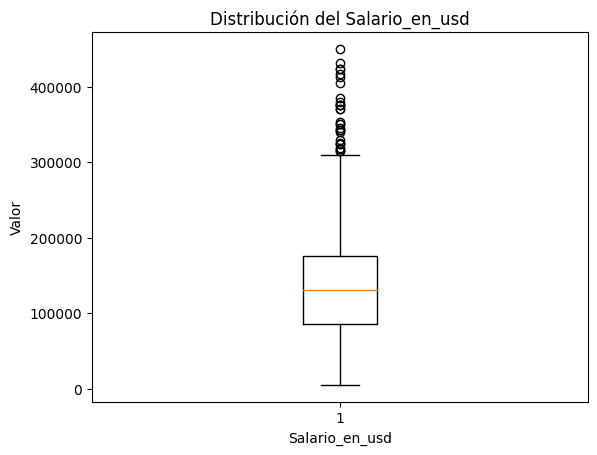

In [28]:
# grafico de Caja y Bigotes para analizar la Distribucion de salarios

plt.boxplot(datos['Salario_en_usd'])
plt.xlabel('Salario_en_usd')
plt.ylabel('Valor')
plt.title('Distribución del Salario_en_usd')
plt.show()

En este gráfico, se puede observar que la mediana del salario se encuentra aproximadamente en el centro del rango intercuartil. Los bigotes se extienden hasta ciertos valores máximos y mínimos, lo que indica la amplitud de la distribución de salarios. También se pueden identificar algunos valores atípicos por encima del máximo del rango intercuartil.

En resumen, este gráfico de caja nos proporciona información sobre la dispersión y la presencia de valores atípicos en la distribución de los salarios en el conjunto de datos. Nos permite visualizar rápidamente la variabilidad y los valores extremos en la distribución salarial.

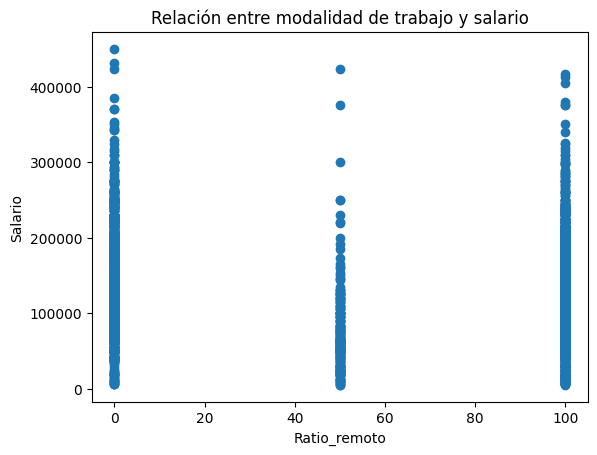

In [23]:
# Gráfico de dispersión salario vs. modalidad de trabajo
plt.scatter(datos['Ratio_remoto'], datos['Salario_en_usd'])
plt.xlabel('Ratio_remoto')
plt.ylabel('Salario')
plt.title('Relación entre modalidad de trabajo y salario')
plt.show()

Este gráfico nos permite visualizar si existe alguna relación o patrón entre la modalidad de trabajo (representada por el ratio remoto) y el salario. Si los puntos tienden a agruparse o seguir una tendencia específica, puede indicar una relación entre estas dos variables.

En el gráfico, si los puntos están dispersos de manera aleatoria y no muestran una tendencia clara, sugiere que no existe una relación lineal fuerte entre el ratio remoto y el salario. Sin embargo, si los puntos tienden a formar una línea ascendente o descendente, indicaría una posible relación positiva o negativa entre ambas variables.

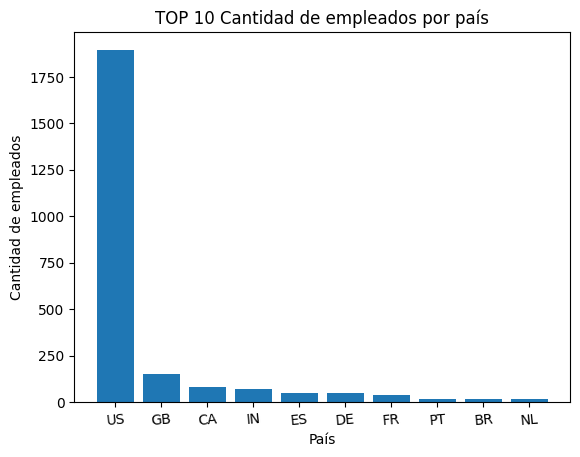

In [44]:
# Contar la cantidad de empleados por país
empleados_por_pais = data_df['Residencia_empleado'].value_counts().nlargest(10)

# Gráfico de barras de la cantidad de empleados por país
plt.bar(empleados_por_pais.index, empleados_por_pais.values)
plt.xlabel('País')
plt.ylabel('Cantidad de empleados')
plt.title('TOP 10 Cantidad de empleados por país')
plt.xticks(rotation=5)
plt.show()

El gráfico muestra una comparativa de los 10 países con mayor cantidad de empleados, resaltando la distribución de los recursos humanos en diferentes ubicaciones geográficas. Cada barra representa un país y su altura está determinada por el número de empleados que residen en ese país.

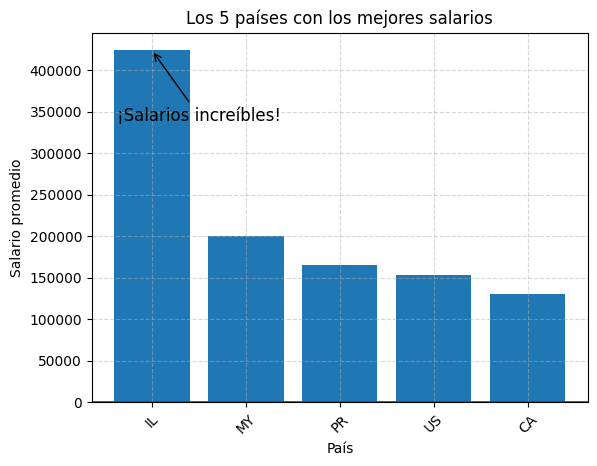

In [56]:
# Gráfico de barras top 5 salarios por pais
plt.bar(top_paises_salarios.index, top_paises_salarios.values)
plt.xlabel('País')
plt.ylabel('Salario promedio')
plt.title('Los 5 países con los mejores salarios')
plt.xticks(rotation=45)

# Estilos
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='red', linewidth=2)
plt.annotate('¡Salarios increíbles!', xy=(0, top_paises_salarios.max()), xytext=(0.5, top_paises_salarios.max()*0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')

plt.show()

En este gráfico de barras muestra los salarios promedio de los 5 países con los mejores salarios. Cada barra representa un país y la altura de la barra indica el salario promedio en esa ubicación.